## Setting up

In [1]:
#Import packages

import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


data = pd.read_csv("rao_huvec_10kb.tads.boundary.4mer.features.csv")
#data

C:\Users\leyen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

In [ ]:
#data.info()

In [2]:
#Take out the unneeded row
i = data[(data.AAAA == 'AAAA')].index
data = data.drop(i)

In [3]:
#Indicate features and class label
x = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')
y = data["class"].astype('int')

In [4]:
#Split data into training (80%) and testing (testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)

In [5]:
#Scale the features to center zero mean and unit standard deviation
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

## Classic random forest model

In [6]:
#Build the random forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
#Check y prediction
y_pred = model.predict(x_test)

y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [8]:
#Check report on confusion_matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[848 540]
 [384 936]]
0.6587887740029542


## Random forest model with 10-fold cross validation

In [9]:
#Using 10-fold cross validation on the random forest model
from sklearn.model_selection import cross_val_score
train_score = cross_val_score(model, x_train, y_train, scoring = 'accuracy', cv=10)
test_score = cross_val_score(model, x_test, y_test, scoring = 'accuracy', cv=10)

print(train_score)
print(test_score)

[0.64852399 0.63837638 0.6278855  0.63250231 0.6398892  0.64173592
 0.63527239 0.62880886 0.65743306 0.64081256]
[0.61254613 0.70848708 0.67896679 0.6199262  0.65682657 0.64944649
 0.56826568 0.61623616 0.61851852 0.67407407]


## Further tuning the model’s hyperparameters with GridSearchCV

In [15]:
model_param = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [16]:
# set up grid search meta-estimator
clf = GridSearchCV(model, model_param, scoring='accuracy', cv=10)

# train the grid search meta-estimator to find the best model
mod = clf.fit(x, y)

In [17]:
#Print out the the best parameter and score
params = clf.best_params_
print("Best Parameters: ", params)

score = clf.best_score_
print("Best Score: ", score)

Best Parameters:  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 300}
Best Score:  0.6519202363367799


## Accuracy, AUC (area under the curve) score, Precision, Recall, F1 score

In [31]:
#Accuracy, Precision, Recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.6587887740029542
Precision:  0.6341463414634146
Recall:  0.7090909090909091
F1 score:  0.6695278969957082


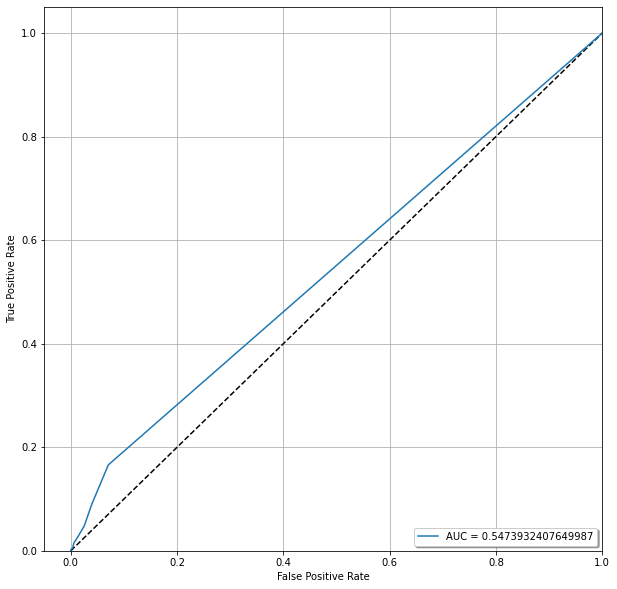

In [32]:
#AUC

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = clf.score(x_test,y_test)

# get roc/auc info
y_score = clf.predict_proba(x_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [34]:
# save the model to disk
import pickle 
filename = 'rao_huvec.pickle'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print("Test Score: " ,result)

Test Score:  0.6587887740029542
